<center>

# Shenfun - High-Performance Computing platform for the Spectral Galerkin method

<div><img src="https://rawcdn.githack.com/spectralDNS/spectralutilities/f3419a3e6c40dad55be5dcca51f6e0e21713dd90/figures/Chebyshev_Polynomials_of_the_First_Kind.svg" width="300"></div>


# Shenfun - facts

1. Shenfun is named in honour of <strong>Professor Jie Shen</strong> for his seminal work on the spectral Galerkin method:-) 
2. Shenfun is a high performance computing platform for solving partial differential equations (PDEs) with the spectral Galerkin method.
3. Shenfun has been run with 65,000 processors on a Cray XC40.
4. Shenfun is a high-level <strong>Python</strong> package originally developed for pseudo-spectral turbulence simulations.


<img src="https://rawcdn.githack.com/spectralDNS/spectralutilities/473129742f0b5f8d57e8c647809272c0ced99a45/movies/RB_200k_small.png" style="float:left" width="300"> <img src="https://rawcdn.githack.com/spectralDNS/spectralutilities/473129742f0b5f8d57e8c647809272c0ced99a45/movies/isotropic_cropped.gif" style="float:right" width="200"> 
<p style="clear: both;">

# The Spectral Galerkin method

## Advantages

- Accuracy (spectral)
- Sparsity - very low memory use for coefficient matrices 
- Efficiency - Very fast linear algebra solvers due to sparsity
- Robustness (round-off errors) - condition numbers much lower than for collocation methods

## Disadvantages

- No complex grids. Structured tensor product grids only
- Nonlinear terms must be implemented explicitly (pseudospectral)
- Generally considered more difficult to implement since we solve equations in spectral space

# The Spectral Galerkin method (in a nutshell)

approximates solutions $u(x)$ using global <strong>trial</strong> functions $\phi_k(x)$ and unknown expansion coefficients $\hat{u}_k$

$$
u(x) = \sum_{k=0}^{N-1}\hat{u}_k \phi_k(x)
$$

Multidimensional solutions are formed from outer (tensor) products of 1D bases

$$
u(x, y) = \sum_{k=0}^{N_0-1}\sum_{l=0}^{N_1-1}\hat{u}_{kl} \phi_{kl}(x, y)\quad \text{ or }\quad
u(x, y, z) = \sum_{k=0}^{N_0-1}\sum_{l=0}^{N_1-1} \sum_{m=0}^{N_2-1}\hat{u}_{klm} \phi_{klm}(x, y, z)
$$

where, for example

$$
\begin{align}
\phi_{kl}(x, y) &= T_k(x) L_l(y)\\
\phi_{klm}(x, y, z) &= T_k(x) L_l(y) \exp(\text{i}mz)
\end{align}
$$

$T_k$ and $L_k$ are Chebyshev and Legendre polynomials.

# The Spectral Galerkin method

solves PDEs, like Poisson's equation

\begin{align}
\nabla^2 u(x) &= f(x), \quad x \in [-1, 1] \\
u(\pm 1) &= 0
\end{align}

using variational forms by the <strong>method of weighted residuals</strong>. I.e., multiply PDE by a test function $v$ and integrate over the domain. For Poisson this leads to the problem:

Find $u \in H^1_0$ such that 

$$(\nabla u, \nabla v)_w^N = -(f, v)_w^N \quad \forall v \in H^1_0$$

Here $(u, v)_w^{N}$ is a weighted inner product and $v(=\phi_j)$ is a <strong>test</strong> function. 


# Weighted inner products

The weighted inner product is defined as

$$
 (u, v)_w = \int_{\Omega} u \overline{v} w \, d\Omega,
$$

where $w(\mathbf{x})$ is a weight associated with the chosen basis (different bases have different weights). The overline represents a complex conjugate (for Fourier).

$\Omega$ is a Cartesian product domain spanned by the chosen 1D bases.


# In Shenfun quadrature is used for the integrals

1D with Chebyshev basis:

$$
(u, v)_w ^N = \sum_{i=0}^{N-1} u(x_i) v(x_i) \omega_i \approx \int_{-1}^1 \frac{u v}{\sqrt{1-x^2}}  \, {dx},
$$

where $\{\omega_i\}_{i=0}^{N-1}$ are the quadrature weights associated with the chosen basis and quadrature rule. The associated quadrature points are denoted as $\{x_i\}_{i=0}^{N-1}$. 

2D with mixed Chebyshev-Fourier:

$$
(u, v)_w^N = \int_{-1}^1\int_{0}^{2\pi} \frac{u \overline{v}}{2\pi\sqrt{1-x^2}} \, {dxdy} \approx \sum_{i=0}^{N_0-1}\sum_{j=0}^{N_1-1} u(x_i, y_j) \overline{v}(x_i, y_j) \omega^{(x)}_i \omega_j^{(y)} ,
$$


# Spectral Galerkin solution procedure

1. Choose function space(s) satisfying the correct boundary conditions
2. Transform PDEs to variational forms using inner products
3. Assemble variational forms and solve resulting linear algebra systems

# Orthogonal bases

<p style="margin-bottom:1cm;">

| Family    | Basis                                    | Weight   | Domain    |
|  :---:    |         :---:                            | :---:    |  :---:   |
| Chebyshev | $$\{T_k\}_{k=0}^{N-1}$$                  | $$1/\sqrt{1-x^2}$$ | $$[-1, 1]$$ |
| Legendre  | $$\{L_k\}_{k=0}^{N-1}$$                  |  1       |$$[-1, 1]$$ |
| Jacobi    | $$\{J_k^{(\alpha,\beta)}\}_{k=0}^{N-1}$$ | $$(1-x)^{\alpha}(1+x)^{\beta}$$ |  $$[-1, 1]$$ |
| Fourier   | $$\{\exp(\text{i}kx)\}_{k=-N/2}^{N/2-1}$$| $$1/(2\pi)$$  |$$[0, 2\pi]$$ |
| Hermite   | $$\{H_k\}_{k=0}^{N-1}$$                  | $$e^{-x^2/2}$$        | $$[-\infty, \infty]$$|
| Laguerre  | $$\{La_k\}_{k=0}^{N-1}$$                 | $e^{-x/2}$        | $$[0, \infty]$$ |


In [6]:
from shenfun import *
N = 8
C = FunctionSpace(N, 'Chebyshev', quad='GC', domain=[-2, 2])
L = FunctionSpace(N, 'Legendre')
x, w = C.points_and_weights()
print(C.points_and_weights())
C.sympy_basis(4)

(array([ 0.98078528,  0.83146961,  0.55557023,  0.19509032, -0.19509032,
       -0.55557023, -0.83146961, -0.98078528]), array([0.39269908, 0.39269908, 0.39269908, 0.39269908, 0.39269908,
       0.39269908, 0.39269908, 0.39269908]))


8*x**4 - 8*x**2 + 1

# Jie Shen's bases with Dirichlet bcs
<p style="margin-bottom:1cm;">


| family    | Basis                 | Boundary condition |
|-----------|-----------------------|----------|
| Chebyshev | $$\{T_k-T_{k+2}\}_{k=0}^{N-3}$$ | $$u(\pm 1) = 0$$ |
| Legendre  | $$\{L_k-L_{k+2}\}_{k=0}^{N-3}$$ | $$u(\pm 1) = 0$$ |
| Hermite   | $$\exp(-x^2)\{H_k\}_{k=0}^{N-1}$$ | $$u(\pm \infty) = 0$$ |
| Laguerre  | $$\exp(-x/2)\{La_k-La_{k+1}\}_{k=0}^{N-2}$$| $$u(0) = u(\infty) = 0$$ |

Composite bases are implemented using a stencil matrix, such that

$$
\phi_i = \sum_{j=0}^{N-1} K_{ij}Q_j
$$

where $K$ is the stencil matrix and $\{Q_j\}_{j=0}^{N-1}$ are the orthogonal polynomials, like $T_j$ or $L_j$.

In [8]:
N = 8
C0 = FunctionSpace(N, 'Chebyshev', bc=(0, 0))
L0 = FunctionSpace(N, 'Legendre', bc=(0, 0))
H0 = FunctionSpace(N, 'Hermite')
La = FunctionSpace(N, 'Laguerre', bc=(0, 0))
L0.stencil_matrix().diags().toarray()

array([[ 1.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

# Shen's bases with Neumann $u'(\pm 1) = 0$

<p style="margin-bottom:1cm;">

| family    | Basis                 |
|-----------|-----------------------|
| Chebyshev | $$\left\{T_k-\frac{k^2}{(k+2)^2}T_{k+2}\right\}_{k=0}^{N-3}$$ | 
| Legendre  | $$\left\{L_k-\frac{k(k+1)}{(k+2)(k+3)}L_{k+2}\right\}_{k=0}^{N-3}$$ |

In [11]:
CN = FunctionSpace(N, 'Chebyshev', bc={'left': ('N', 0), 'right': ('N', 0)})
LN = FunctionSpace(N, 'Legendre', bc={'left': ('N', 0), 'right': ('N', 0)})
dict(CN.stencil_matrix())

{0: array([1, 1, 1, 1, 1, 1, 0, 0]),
 2: array([-0.        , -0.11111111, -0.25      , -0.36      , -0.44444444,
        -0.51020408])}

# Shen's biharmonic bases $u(\pm 1) = u'(\pm 1) = 0$
<p style="margin-bottom:1cm;">

| family    | Basis                 |
|-----------| :-----------------:   |
| Chebyshev | $$\left\{T_k-\frac{2(k+2)}{k+3}T_{k+2}+\frac{k+1}{k+3} T_{k+4}\right\}_{k=0}^{N-5}$$ | 
| Legendre  | $$\left\{L_k-\frac{2(2k+5)}{(2k+7)}L_{k+2}+\frac{2k+3}{2k+7}L_{k+4}\right\}_{k=0}^{N-5}$$ |


In [12]:
CB = FunctionSpace(N, 'Chebyshev', bc=(0, 0, 0, 0))
LB = FunctionSpace(N, 'Legendre', bc=(0, 0, 0, 0))
dict(CB.stencil_matrix())

{0: array([1, 1, 1, 1, 0, 0, 0, 0]),
 2: array([-1.33333333, -1.5       , -1.6       , -1.66666667,  0.        ,
         0.        ]),
 4: array([0.33333333, 0.5       , 0.6       , 0.66666667])}

# Multidimensional tensor product spaces
<p style="margin-bottom:0.5cm;">

$$
\begin{align}
L_0 &= \{L_k(x)-L_{k+2}(x)\}_{k=0}^{N-3} \\
C_0 &= \{T_k(x)-T_{k+2}(x)\}_{k=0}^{N-3} \\
L_1 &= \{L_l(y)\}_{l=0}^{N-1} \\
LL(x, y) &= L_0(x) \otimes L_1(y) \\
CL(x, y) &= C_0(x) \otimes L_1(y)
\end{align}
$$


In [14]:
L0 = FunctionSpace(N, 'Legendre', bc=(0, 0))
C0 = FunctionSpace(N, 'Chebyshev', bc=(0, 0))
L1 = FunctionSpace(N, 'Legendre')
LL = TensorProductSpace(comm, (L0, L1)) # comm is MPI.COMM_WORLD
CL = TensorProductSpace(comm, (C0, L1))
V = VectorSpace(LL) # For vector valued functions
f = Array(LL)

# Operators in shenfun

Act on instances of a `TestFunction`, `TrialFunction` or `Function`

- div
- grad
- curl
- Dx   (for a partial derivative)

# Assembly
- project
- inner

In [20]:
L0 = FunctionSpace(N, 'Legendre', bc=(0, 0))
L1 = FunctionSpace(N, 'Legendre')
u = TrialFunction(L0)
v = TestFunction(L0)
uh = Function(L0)
g = Array(L0)
du = grad(u)  # vector valued expression
h = div(du)   # scalar valued expression

A = inner(Dx(u, 0, 2), v)
dict(A)

{0: array([ -6., -10., -14., -18., -22., -26.])}

# The shenfun `Function` represents the solution

`uh = Function(L0)`

$$
u_h(x) = \sum_{k=0}^{N-1} \hat{u}_k \phi_{k}(x)
$$

The function evaluated for all quadrature points, $\{x_j\}_{j=0}^{N-1}$, is an `Array`

`uj = Array(L0)`

There is a (fast) `backward` transform for moving from `Function` to `Array`, and a `forward` transform to go the other way.

In [21]:
uj = Array(L0)
uj = uh.backward(uj)
uh = uj.forward(uh)

# Projections

Project $g(\mathbf{x})$ to $V$:

Find $u$ in $V$ such that:

$$(u, v)_w = (I^Ng, v)_w \quad \text{for} \, v \in V $$

where $I^Ng$ is $\{g(x_j)\}_{j=0}^{N-1}$, i.e., $g(x)$ evaluated on the quadrature mesh.

Works if $g(x)$ is 

- an `Array`, which is exactly a `Function` evaluated on the mesh
- an expression involving a `Function`, like `div(grad(uh))`
- a `sympy` expression, like `sin(x)`





In [24]:
dudx = project(Dx(uh, 0, 1), L1) # Compute du/dx
wh = project(uj, L1)
import sympy as sp
x, y = sp.symbols('x,y')
ws = project(sp.sin(4*x), L1)
ws.eval(np.array([0.51]))

array([0.89217196])

# Implementation matches mathematics
<p style="margin-bottom:1cm;">

$$
A = (\nabla u, \nabla v)_w^N
$$

In [25]:
A = inner(grad(u), grad(v))

In [26]:
dict(A)

{0: array([ 6., 10., 14., 18., 22., 26.])}

In [27]:
print(A.diags().todense())

[[ 6.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.]
 [ 0.  0. 14.  0.  0.  0.]
 [ 0.  0.  0. 18.  0.  0.]
 [ 0.  0.  0.  0. 22.  0.]
 [ 0.  0.  0.  0.  0. 26.]]


A diagonal stiffness matrix!

# Complete Poisson solver with error verification in 1D


In [35]:
# Solve Poisson's equation
import matplotlib.pyplot as plt
from sympy import symbols, sin, cos, lambdify
from shenfun import * 

# Use sympy to compute manufactured solution
x, y = symbols("x,y")
ue = sin(6*sp.pi*x)*(1-x**2) # `ue` is the manufactured solution
fe = ue.diff(x, 2) # `fe` is Poisson's right hand side for `ue`

SD = FunctionSpace(50, 'L', bc=(0, 0))
u = TrialFunction(SD)
v = TestFunction(SD)

b = inner(v, Array(SD, buffer=fe)) # Array is initialized with `fe`
A = inner(v, div(grad(u)))

uh = Function(SD)
uh = A.solve(b, uh)
ue = Array(SD, buffer=ue)
print("L2-error = ", np.sqrt(inner(1, (uh.backward()-ue)**2)))

L2-error =  2.2700660522175402e-14


In [36]:
fe

2*(-12*pi*x*cos(6*pi*x) + 18*pi**2*(x**2 - 1)*sin(6*pi*x) - sin(6*pi*x))

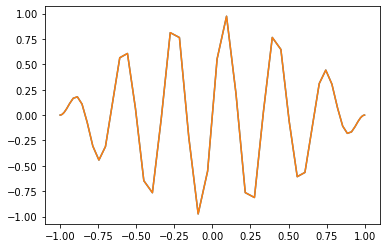

In [33]:
plt.plot(SD.mesh(), uh.backward(), SD.mesh(), ue)

# 2D - still closely matching mathematics

In [37]:
L0 = FunctionSpace(N, 'Legendre', bc=(0, 0))
F1 = FunctionSpace(N, 'Fourier', dtype='d')
TP = TensorProductSpace(comm, (L0, F1))
u = TrialFunction(TP)
v = TestFunction(TP)
A = inner(grad(u), grad(v))

In [38]:
print(A)

[<shenfun.matrixbase.TPMatrix object at 0x1a29a4d30>, <shenfun.matrixbase.TPMatrix object at 0x1a29a4e20>]


# ? 

A is a list of two TPMatrix objects???


# `TPMatrix` is a Tensor Product matrix

A `TPMatrix` is the outer product of smaller matrices (2 in 2D, 3 in 3D etc).  

Consider the inner product:

$$
\begin{align}
(\nabla u, \nabla v)_w &= \frac{1}{2\pi}\int_{-1}^{1}\int_{0}^{2\pi} \left(\frac{\partial u}{\partial x}, \frac{\partial u}{\partial y}\right) \cdot \left(\frac{\partial \overline{v}}{\partial x}, \frac{\partial \overline{v}}{\partial y}\right) {dxdy} \\
(\nabla u, \nabla v)_w &= \frac{1}{2\pi}\int_{-1}^1 \int_{0}^{2\pi} \frac{\partial u}{\partial x}\frac{\partial \overline{v}}{\partial x} {dxdy} + \int_{-1}^1 \int_{0}^{2\pi} \frac{\partial u}{\partial y}\frac{\partial \overline{v}}{\partial y} {dxdy}
\end{align}
$$

which, like `A`, is a sum of two terms. These two terms are the two `TPMatrix`es returned by `inner` above.

Now each one of these two terms can be written as the outer product of two smaller matrices. 

Consider the first, inserting for test and trial functions

$$
\begin{align}
v &= \phi_{kl} = (L_k(x)-L_{k+2}(x))\exp(\text{i}ly) \\
u &= \phi_{mn}
\end{align}
$$

The first term becomes

$$
\small
\begin{align}
\int_{-1}^1 \int_{0}^{2\pi} \frac{\partial u}{\partial x}\frac{\partial \overline{v}}{\partial x} \frac{dxdy}{2\pi} &= \underbrace{\int_{-1}^1 \frac{\partial (L_m-L_{m+2})}{\partial x}\frac{\partial (L_k-L_{k+2})}{\partial x} {dx}}_{a_{km}} \underbrace{\int_{0}^{2\pi}  \exp(iny) \exp(-ily) \frac{dy}{2\pi}}_{\delta_{ln}} \\
   &= a_{km} \delta_{ln}
\end{align}
$$

and the second

$$
\small
\begin{align}
\int_{-1}^1 \int_{0}^{2\pi} \frac{\partial u}{\partial y}\frac{\partial \overline{v}}{\partial y} \frac{dxdy}{2\pi} &= \underbrace{\int_{-1}^1 (L_m-L_{m+2})(L_k-L_{k+2}) {dx}}_{b_{km}} \underbrace{\int_{0}^{2\pi} ln \exp(iny) \exp(-ily)\frac{dy}{2\pi}}_{l^2\delta_{ln}} \\
   &= l^2 b_{km} \delta_{ln}
\end{align}
$$

All in all:

$$
(\nabla u, \nabla v)_w = \left(a_{km} \delta_{ln} + l^2 b_{km} \delta_{ln}\right)
$$

The sum of two tensor product matrices!

In [40]:
A = inner(grad(u), grad(v)) # <- list of two TPMatrices
for mat in A[1].mats:  # a_{km} and \delta_{ln}
    print(mat.diags().todense())

[[ 2.4         0.         -0.4         0.          0.          0.        ]
 [ 0.          0.95238095  0.         -0.28571429  0.          0.        ]
 [-0.4         0.          0.62222222  0.         -0.22222222  0.        ]
 [ 0.         -0.28571429  0.          0.46753247  0.         -0.18181818]
 [ 0.          0.         -0.22222222  0.          0.37606838  0.        ]
 [ 0.          0.          0.         -0.18181818  0.          0.31515152]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  4.  0.  0.]
 [ 0.  0.  0.  9.  0.]
 [ 0.  0.  0.  0. 16.]]


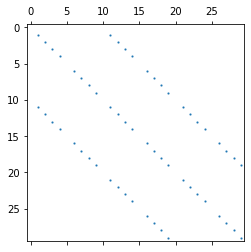

In [41]:
plt.spy(A[1].diags(), markersize=1)

# 3D Poisson (with MPI and Fourier x 2)

In [42]:
from sympy import symbols, sin, cos, lambdify
from shenfun import *

# Use sympy to compute manufactured solution
x, y, z = symbols("x,y,z")
ue = (cos(4*x) + sin(2*y) + sin(4*z))*(1-x**2)
fe = ue.diff(x, 2) + ue.diff(y, 2) + ue.diff(z, 2)

C0 = FunctionSpace(32, 'Chebyshev', bc=(0, 0))
F1 = FunctionSpace(32, 'Fourier', dtype='D')
F2 = FunctionSpace(32, 'Fourier', dtype='d')
T = TensorProductSpace(comm, (C0, F1, F2))
u = TrialFunction(T)
v = TestFunction(T)

# Assemble left and right hand
f_hat = inner(v, Array(T, buffer=fe))
A = inner(v, div(grad(u)))

# Solve
solver = chebyshev.la.Helmholtz(*A) # Very fast solver due to Jie Shen
u_hat = Function(T)
u_hat = solver(f_hat, u_hat)
assert np.linalg.norm(u_hat.backward()-Array(T, buffer=ue)) < 1e-12
print(u_hat.shape)

(32, 32, 17)


# Contour plot of slice with constant y

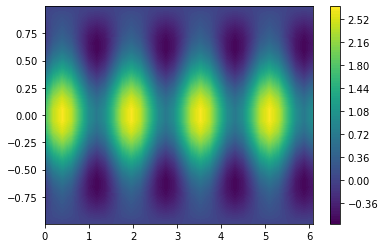

In [43]:
X = T.local_mesh()
ua = u_hat.backward()
plt.contourf(X[2][0, 0, :], X[0][:, 0, 0], ua[:, 2], 100)
plt.colorbar()

# Run with MPI distribution of arrays

Here we would normally run from a bash shell
<p style="margin-bottom:0.5cm;">

<div style="color:black"> <strong>[bash shell] mpirun -np 4 python poisson3D.py </strong> </div>

Since we are in a Jupyter notebook, lets actually do this from python in a live cell:-) The exclamation mark '!' is a magic command to run bash scripts in Jupyter. 

In [44]:
!mpirun -np 8 python poisson3D.py

(32, 8, 9)
(32, 8, 8)
(32, 8, 8)
(32, 8, 8)
(32, 8, 9)
(32, 8, 9)
(32, 8, 9)
(32, 8, 8)


Note that Fourier bases are especially attractive because of features easily handled with MPI:

    - diagonal matrices
    - fast transforms

# Nonlinearities (convolution)
All treated with pseudo-spectral techniques

$$
\begin{align}
\hat{w}_k &= \widehat{u^2}_k
\end{align}
$$

That is, transform `Function`s to real space `Array`s, perform the nonlinear operation there and transform the nonlinear product back to spectral space (to a `Function`).

3/2-rule or 2/3-rule is possible for dealiasing with Fourier. Not for the remaining bases.

In [ ]:
uj = Array(SD)
#uj[:] = np.random.random(uj.shape)
uj = uh.backward(uj)
wh = Function(SD)
wh = SD.forward(uj*uj, wh)

# Mixed tensor product spaces

Solve several equations simultaneously

- Coupled equations
- Block matrices and vectors
- Tensor spaces of vectors, like velocity $u \in [\mathbb{R}^3]^3$

# Stokes equations
### lid-driven cavity - coupled solver
<p style="margin-bottom:0.25cm;">

$$
\begin{align*}
\nabla^2 \mathbf{u} - \nabla p &= \mathbf{f} \quad \text{in }  \Omega, \quad \quad \Omega = [-1, 1]\times[-1, 1]\\ 
\nabla \cdot \mathbf{u} &= h \quad \text{in } \Omega  \\ 
\int_{\Omega} p dx &= 0 \\
\mathbf{u}(\pm 1, y) = \mathbf{u}(x, -1) = (0, 0) &\text{ and }\mathbf{u}(x, 1) = (1, 0) \text{ or } ((1-x^2)(1+x^2), 0)
\end{align*}
$$

Given appropriate spaces $V$ and $Q$ a variational form reads: find $(\mathbf{u}, p) \in V \times Q$ such that 

$$
\begin{equation}
a((\mathbf{u}, p), (\mathbf{v}, q)) = L((\mathbf{v}, q)) \quad \forall (\mathbf{v}, q) \in V \times Q
\end{equation}
$$

where bilinear and linear forms are, respectively

$$
\begin{equation}
    a((\mathbf{u}, p), (\mathbf{v}, q)) = \int_{\Omega} (\nabla^2 \mathbf{u} - \nabla p) \cdot {\mathbf{v}} \, dx_w + \int_{\Omega} \nabla \cdot \mathbf{u} \, {q} \, dx_w,
\end{equation}
$$
$$
\begin{equation}  
    L((\mathbf{v}, q)) = \int_{\Omega} \mathbf{f} \cdot {\mathbf{v}}\, dx_w + \int_{\Omega} h {q} \, dx_w
\end{equation}
$$

Using integration by parts for Legendre

$$
\begin{equation}
    a((\mathbf{u}, p), (\mathbf{v}, q)) = -\int_{\Omega} \nabla \mathbf{u} \cdot \nabla{\mathbf{v}} \, dx_w + \int_{\Omega} \nabla \cdot \mathbf{v} \, {p} \, dx_w + \int_{\Omega} \nabla \cdot \mathbf{u} \, {q} \, dx_w,
\end{equation}
$$

# Implementation of spaces, basis functions

In [46]:
N = (40, 40)
family = 'Legendre'
D0X = FunctionSpace(N[0], 'Legendre', bc=(0, 0))
#D1Y = FunctionSpace(N[1], 'Legendre', bc=(1, 0)) # Regular lid
D1Y = FunctionSpace(N[1], 'Legendre', bc=(0, (1-x)**2*(1+x)**2)) # Regularized lid
D0Y = FunctionSpace(N[1], 'Legendre', bc=(0, 0))
PX = FunctionSpace(N[0], 'Legendre')
PY = FunctionSpace(N[1], 'Legendre')

# All required spaces
V1 = TensorProductSpace(comm, (D0X, D1Y))
V0 = TensorProductSpace(comm, (D0X, D0Y))
Q = TensorProductSpace(comm, (PX, PY), modify_spaces_inplace=True)
V = VectorSpace([V1, V0])
W = CompositeSpace([V0, V0])
VQ = CompositeSpace([V, Q])

# For inf-sup use P_N - P_{N-2} for velocity-pressure
PX.slice = lambda: slice(0, PX.N-2)
PY.slice = lambda: slice(0, PY.N-2)

# All required test and trial functions
up = TrialFunction(VQ)
vq = TestFunction(VQ)
u, p = up
v, q = vq

# Implementation Stokes - matrices and solve

In [47]:
# Assemble matrices
A = inner(grad(v), -grad(u))
G = inner(div(v), p)
D = inner(q, div(u))

# Create Block matrix
sol = la.BlockMatrixSolver(A+G+D)

# Functions to hold solution and rhs
up_hat = Function(VQ)
fh_hat = Function(VQ)

# Solve Stokes problem. Note constraint for pressure
up_hat = sol(fh_hat, u=up_hat, constraints=((2, 0, 0),)) 

# Move solution to Array in real space
up = up_hat.backward()
u_, p_ = up

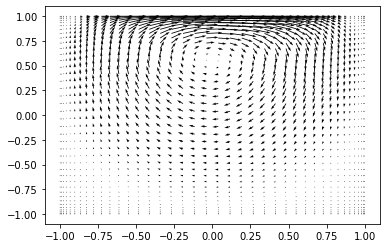

In [48]:
X = Q.local_mesh(True)
plt.quiver(X[0], X[1], u_[0], u_[1])

# Sparsity pattern of block matrix

$$
M =
  \begin{bmatrix}
      A[0]+A[1] & 0 & G[0] \\
      0 & A[2]+A[3] & G[1] \\ 
      D[0] & D[1] & 0
  \end{bmatrix}
$$

In [ ]:
%matplotlib notebook
plt.figure(figsize=(6,4))
plt.spy(sol.mat.diags(), markersize=0.5)

# Block matrix

$$
M =
  \begin{bmatrix}
      A[0]+A[1] & 0 & G[0] \\
      0 & A[2]+A[3] & G[1] \\ 
      D[0] & D[1] & 0
  \end{bmatrix}
$$

where $D = G^T$ for the Legendre basis, making $M$ symmetric. For Chebyshev $M$ will not be symmetric.

Solver through [scipy.sparse.linalg](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html)

For Navier-Stokes of the lid-driven cavity, see https://github.com/spectralDNS/shenfun/blob/master/demo/NavierStokesDrivenCavity.py